Linear regression equation in the expanded form:

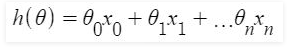

A vectorized form:

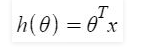

where:  θt - transpozed vector of parameters weights


We'll try to find the best model parameters to minimize a cost function. It is possible to obtain values (weights) of these parameters by solving an algebraic equation called the normal equation.

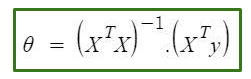



# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#  Generate dataset

In [34]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)
N = len(x)

In [35]:
def least_squared_normal_equation(x, y, n):
    x_bias = np.ones((N, 1))

    # Forming a complete matrix
    x_new = np.reshape(x, (N, 1))
    x_new = np.append(x_bias, x_new, axis=1)
    # print(x_new)

    # Finding transpose:
    x_new_transpose = np.transpose(x_new)
    # print(x_new_transpose)

    # Finding dot product of original and transposed matrix:
    x_new_transpose_dot = x_new_transpose.dot(x_new)

    # Finding Inverse:
    temp1 = np.linalg.inv(x_new_transpose_dot)

    # Multiplication of Matrices
    temp2 = x_new_transpose.dot(y)

    # Finding slope and intercept
    theta = temp1.dot(temp2)
    #
    # intercept = theta[0][0]
    # slope = theta[1][0]
    intercept = theta[0]
    slope = theta[1]
    return x, y, slope, intercept, theta

In [36]:
def plot_data(x, y, slope, intercept):
    plt.scatter(x, y)
    plt.plot(x, slope * x + intercept, color="red")
    plt.show()

In [37]:
def predict_value(input, slope, intercept):
    predicted_value = slope * input + intercept
    return predicted_value

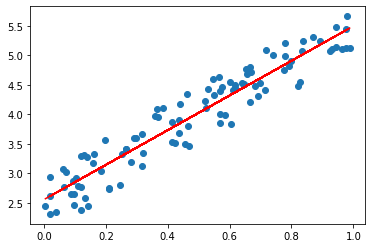

In [38]:
x, y, slope, intercept, theta = least_squared_normal_equation(x, y, N)
plot_data(x, y, slope, intercept)

In [61]:
print("Vector theta:{}".format(theta))

print("Intercept: ", intercept)

print("Slope: ", slope)


Vector theta:[[2.55808002]
 [2.93655106]]
Intercept:  [2.55808002]
Slope:  [2.93655106]


In [58]:
def mean_squared_error(x, y, N, intercept, slope):
    MSE = 0
    for i in range(n):
        y_pred = intercept + slope * x[i]
        MSE += (y[i] - y_pred) ** 2
    MSE = (MSE / N)
    return MSE[0]


def root_mean_squared_error(MSE):
    RMSE = np.sqrt(MSE)
    return RMSE


def R_squared(X, Y, Y_mean, N, a, b):
    sum_of_squares = 0
    sum_of_residuals = 0
    for i in range(N):
        y_pred = intercept + slope * X[i]
        sum_of_squares += (Y[i] - Y_mean) ** 2
        sum_of_residuals += (Y[i] - y_pred) ** 2
    score = 1 - (sum_of_residuals / sum_of_squares)
    return score[0]

In [63]:
Y_mean = np.mean(y)

MSE = (mean_squared_error(x, y, N, intercept, slope))*100
RMSE = root_mean_squared_error(MSE)
R_squar = R_squared(x, y, Y_mean, N, intercept, slope)

print("Mean squared error is equal to : {} %".format(round(MSE,2)))
print("Root squared error is equal to : {} %".format(round(RMSE,2)))
print("R2 is equal to : {} ".format(round(R_squar,2)))

Mean squared error is equal to : 7.62 %
Root squared error is equal to : 2.76 %
R2 is equal to : 0.9 


source: https://medium.com/@shuklapratik22/implementation-of-simple-linear-regression-using-normal-equation-matrices-f9021c3590da